In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import timevarmodels as tvm
from timevarmodels.datasets import temperature

## Trend analysis using Tempeture change 

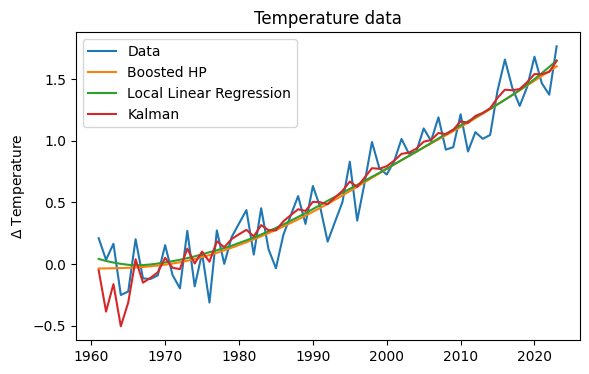

In [5]:
from timevarmodels.datasets import temperature
from timevarmodels import BoostedHP, LocalLinearRegression, Kalman
data = temperature.load()

y = data['World'].values
X = np.ones_like(y)
# Fit the models
model = BoostedHP(y)
boostedTrend, residuals = model.fit()
localLinearRegressionmodel = LocalLinearRegression(vY=y,mX=X)
res = localLinearRegressionmodel.fit()
LLRtrend =res.predicted()
## local linear trend model for Kalman
T_trend = np.array([[1, 1],
                      [0, 1]])
Z_trend = np.array([[1, 0]])
Q_trend = np.array([[0.01**2, 0],
                    [0, 0.01**2]])
H_trend = np.array([[1**2]])
a_1_trend = np.array([0, 0])
P_1_trend = np.eye(2)
kalmanmodel = Kalman(T=T_trend, Z=Z_trend, Q=Q_trend, H=H_trend, a_1=a_1_trend, P_1=P_1_trend)
kalmanTrend = kalmanmodel.smoother(y)[:, 0] # Extract the state component

plt.figure(figsize=(6.5, 4))
x_axis = data.index
plt.title('Temperature data')
plt.plot(x_axis, y, label='Data')
plt.plot(x_axis, boostedTrend, label='Boosted HP')
plt.plot(x_axis, LLRtrend, label='Local Linear Regression')
plt.plot(x_axis, kalmanTrend, label='Kalman')
plt.ylabel('$\Delta$ Temperature')
plt.legend()
plt.savefig('temperature.png', dpi=300)



## Time-Varying Coefficient Illustration with Gold price and USD index

/Users/simeonklumperbeek/Desktop/Studie/Econometrics/Master/Thesis/TimeVarModels/TimeVarModels/timevarmodels/datasets/gold/data.py:41: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data[column].str.replace(".", "").str.replace(",", ".").astype(float)


Local Linear Regression Results
Bandwidth: 0.07622889669632786
Number of observations: 3616
Number of predictors: 1
Beta coefficients (shape: (1, 3616)):
Use the 'betas()' method to get the beta coefficients.
Use the 'plot_betas()' method to plot the beta coefficients.
Use the 'plot_confidence_bands()' method to plot the confidence bands.
You can choose out of 5 types of Bootstrap to construct confidence bands:
SB (Sieve Bootstrap), WB (Wild Bootstrap), SWB (Sieve Wild Bootstrap), MB (Multiplier Bootstrap), LBWB (Local Blockwise Wild Bootstrap)
Use the 'residuals()' method to get the residuals.
Use the 'plot_residuals()' method to plot the residuals.


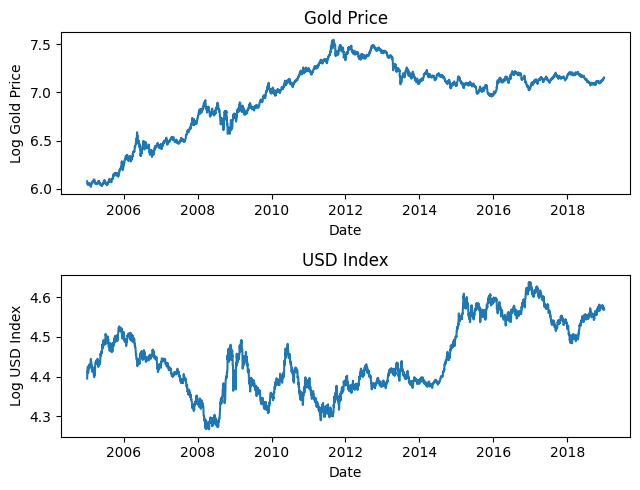

In [16]:
from timevarmodels.datasets import gold, usd
from timevarmodels import LocalLinearRegression
import matplotlib.pyplot as plt
# Load the data
gold_data = gold.load(currencies=["USD"], start_date="2005-01-01", end_date="2019-01-01")
usd_data = usd.load(type="Open", start_date="2005-01-01", end_date="2019-01-01")
# Align the data
gold_data = gold_data.resample("D").mean()
usd_data = usd_data.resample("D").mean()
data = pd.concat([gold_data, usd_data], axis=1).dropna()
data.columns = ["Gold", "USDindex"]
# Log Gold and USDindex for numerical stability
data["Gold"] = np.log(data["Gold"])
data["USDindex"] = np.log(data["USDindex"])
y = data["Gold"].values
X = data["USDindex"].values
fig, axs = plt.subplots(2, 1, figsize=(6.5, 5))
axs[0].plot(data.index, y)
axs[0].set_title('Gold Price')
axs[0].set_xlabel('Date')
axs[0].set_ylabel('Log Gold Price')
axs[1].plot(data.index, X)
axs[1].set_title('USD Index')
axs[1].set_xlabel('Date')
axs[1].set_ylabel('Log USD Index')

plt.tight_layout()
plt.savefig('gold_usd.png', dpi=300)
model = LocalLinearRegression(vY=y, mX=X)
res = model.fit()
res.summary()



Calculating LBWB Bootstrap Samples


100%|██████████| 1299/1299 [02:55<00:00,  7.41it/s]


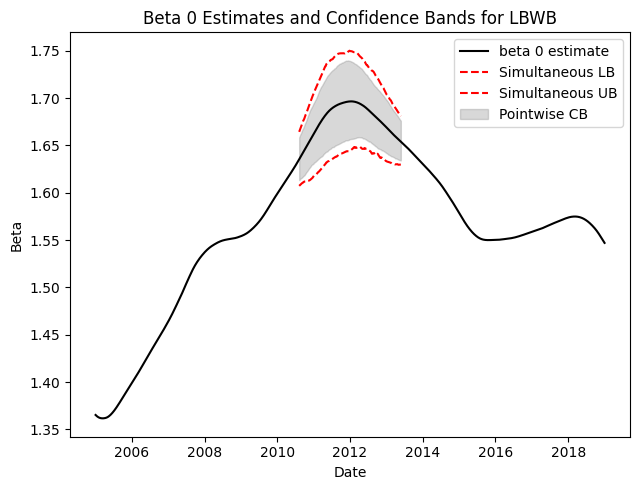

In [4]:
cb = res.plot_confidence_bands(Gsubs=[(int(0.4*len(y)), int(0.6*len(y)))], date_range=('2005-01-01', '2019-01-01'))

Calculating LBWB Bootstrap Samples


100%|██████████| 1299/1299 [12:59<00:00,  1.67it/s]


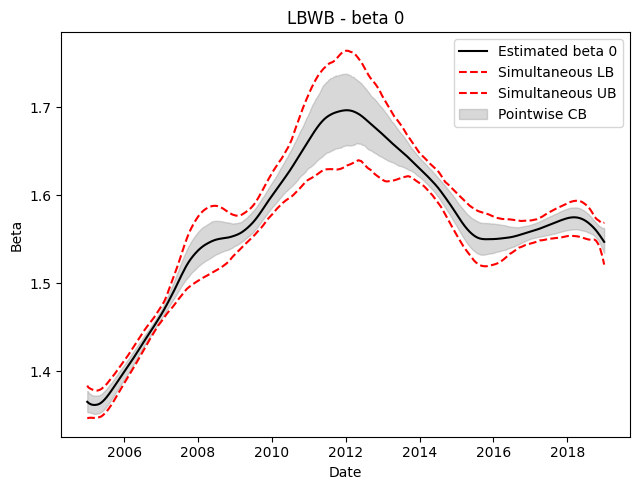

In [5]:
cb = res.plot_confidence_bands(date_range=('2005-01-01', '2019-01-01'))